Verifications:
All PDF values non-negative: True
Total integral of f_Y(y) over [0, ∞): 1.000000
Estimated absolute error in integral: 1.78e-13
Probability P(2 <= Y <= 4): 4.122309e-10
Estimated absolute error in probability: 8.82e-13

=== Distribution Characteristics ===
Mean (μ): 0.3156 hours
Variance (σ²): 0.0293 hours²
Standard Deviation (σ): 0.1711 hours
Quartile 1 (Q1 - 25th percentile): 0.1878 hours
Median (Q2 - 50th percentile): 0.2928 hours
Quartile 3 (Q3 - 75th percentile): 0.4177 hours

Probability P(2 <= Y <= 4): 4.122309e-10
Estimated absolute error in probability: 8.82e-13

Total integral of f_Y(y) over [0, ∞): 1.000000
Estimated absolute error in integral: 1.78e-13


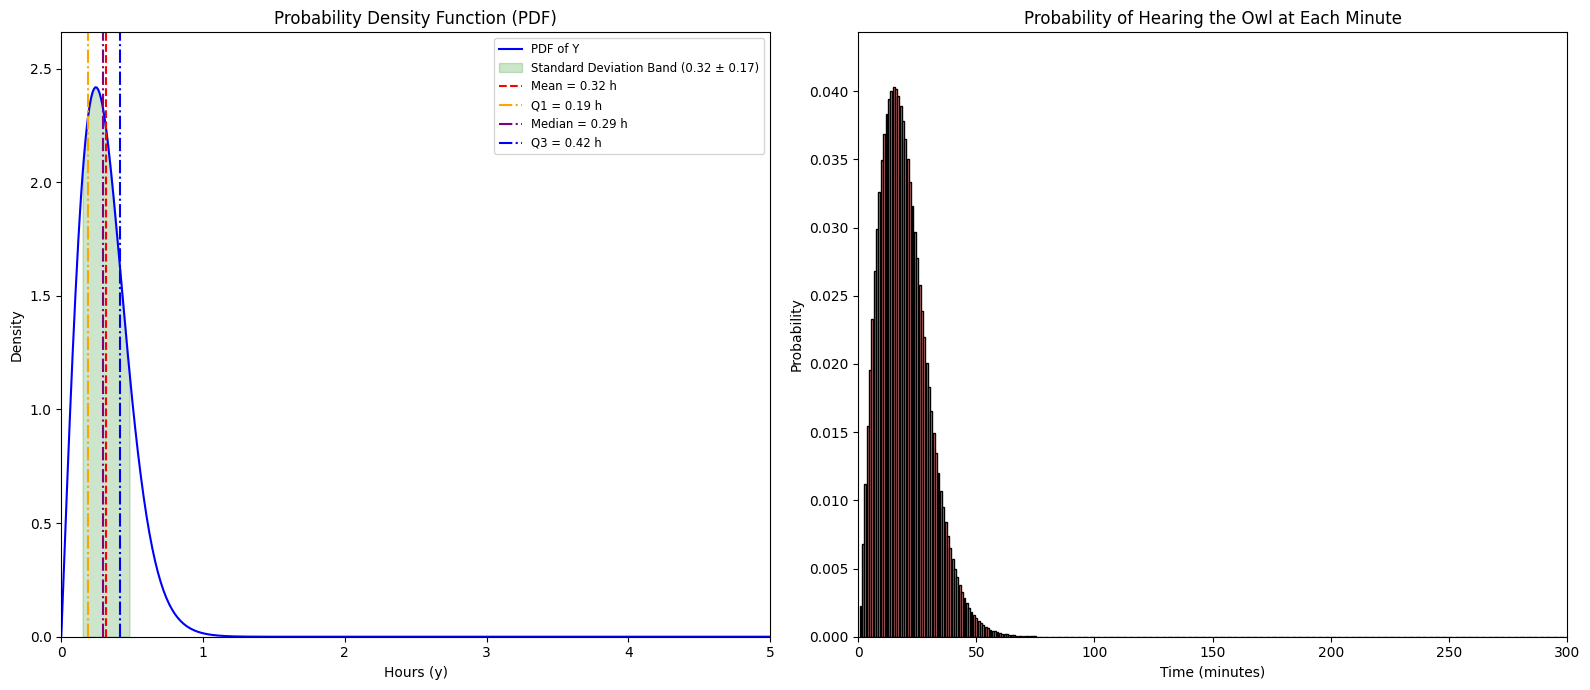

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import bisect
from math import sqrt, pi

# Parameters (ensuring xi_5 + xi_7 = 1)
xi_4 = 3
xi_5 = 0.80
xi_6 = 9
xi_7 = 0.20
xi_8 = 5


# Define the Survival Function S_Y(y) for xi_4 = 3
def S_Y(y):
    return xi_5 * np.exp(-xi_6 * y**2) + xi_7 * np.exp(-xi_8 * y**2)


# Compute the PDF f_Y(y) by differentiating S_Y(y). f_Y(y) = -dS_Y/dy
def f_Y(y):
    return 2 * xi_5 * xi_6 * y * np.exp(-xi_6 * y**2) + 2 * xi_7 * xi_8 * y * np.exp(
        -xi_8 * y**2
    )

print("Verifications:")
# Ensure f_Y(y) is non-negative for all y >= 0
y_test = np.linspace(0, 5, 500)
f_Y_values = f_Y(y_test)
non_negative = np.all(f_Y_values >= 0)
print(f"All PDF values non-negative: {non_negative}")

# Integral of f_Y(y) over [0, ∞) should be 1
total_integral, integral_error = quad(f_Y, 0, 5)
print(f"Total integral of f_Y(y) over [0, ∞): {total_integral:.6f}")
print(f"Estimated absolute error in integral: {integral_error:.2e}")

# Compute the probability P(2 <= Y <= 4)
prob_2_to_4, prob_error = quad(f_Y, 2, 4)
print(f"Probability P(2 <= Y <= 4): {prob_2_to_4:.6e}")
print(f"Estimated absolute error in probability: {prob_error:.2e}")

# Compute mean (μ)
mean_y, mean_error = quad(lambda y: y * f_Y(y), 0, 5)

# Compute variance (σ²)
variance_y, variance_error = quad(lambda y: (y - mean_y) ** 2 * f_Y(y), 0, 5)
std_dev_y = sqrt(variance_y)

# Define the Cumulative Distribution Function (CDF) for quartiles
def CDF(y):
    result, _ = quad(f_Y, 0, y)
    return result

# Function to find quartiles using the CDF
def find_quartile(target_prob):
    return bisect(
        lambda y: CDF(y) - target_prob, 0, 5
    )

# Compute Quartiles
Q1 = find_quartile(0.25)
Q2 = find_quartile(0.50)
Q3 = find_quartile(0.75)

# Compute probabilities for each minute (0 to 300 minutes)
minutes = np.arange(1, 301) 
minute_intervals_start = (minutes - 1) / 60  # Convert to hours
minute_intervals_end = minutes / 60  # Convert to hours

# Compute probability for each minute
minute_probs = np.array([
    quad(f_Y, start, end)[0]
    for start, end in zip(minute_intervals_start, minute_intervals_end)
])

# Print Distribution Characteristics
print("\n=== Distribution Characteristics ===")
print(f"Mean (μ): {mean_y:.4f} hours")
print(f"Variance (σ²): {variance_y:.4f} hours²")
print(f"Standard Deviation (σ): {std_dev_y:.4f} hours")
print(f"Quartile 1 (Q1 - 25th percentile): {Q1:.4f} hours")
print(f"Median (Q2 - 50th percentile): {Q2:.4f} hours")
print(f"Quartile 3 (Q3 - 75th percentile): {Q3:.4f} hours")
print(f"\nProbability P(2 <= Y <= 4): {prob_2_to_4:.6e}")
print(f"Estimated absolute error in probability: {prob_error:.2e}")
print(f"\nTotal integral of f_Y(y) over [0, ∞): {total_integral:.6f}")
print(f"Estimated absolute error in integral: {integral_error:.2e}")
# Plot the PDF and Histogram using Matplotlib
plt.figure(figsize=(16, 7))

# ----- PDF Plot -----
plt.subplot(1, 2, 1)
plt.plot(y_test, f_Y_values, label="PDF of Y", color="blue")

# Shade standard deviation band (μ ± σ)
plt.fill_between(
    y_test,
    0,
    f_Y_values,
    where=(y_test >= (mean_y - std_dev_y)) & (y_test <= (mean_y + std_dev_y)),
    color="green",
    alpha=0.2,
    label=f"Standard Deviation Band ({mean_y:.2f} ± {std_dev_y:.2f})",
)

# Add mean line
plt.axvline(mean_y, color="red", linestyle="--", label=f"Mean = {mean_y:.2f} h")

# Add quartile lines
plt.axvline(Q1, color="orange", linestyle="-.", label=f"Q1 = {Q1:.2f} h")
plt.axvline(Q2, color="purple", linestyle="-.", label=f"Median = {Q2:.2f} h")
plt.axvline(Q3, color="blue", linestyle="-.", label=f"Q3 = {Q3:.2f} h")

plt.xlim(0, 5)
plt.ylim(0, max(f_Y_values) * 1.1)
plt.title(
    "Probability Density Function (PDF)"
)
plt.xlabel("Hours (y)")
plt.ylabel("Density")
plt.legend(loc="upper right", fontsize="small")

# ----- Histogram Plot -----
plt.subplot(1, 2, 2)
plt.bar(minutes, minute_probs, color="lightcoral", edgecolor="black")
plt.title("Probability of Hearing the Owl at Each Minute")
plt.xlabel("Time (minutes)")
plt.ylabel("Probability")
plt.xlim(0, 300)
plt.ylim(0, max(minute_probs) * 1.1)

# Improve layout and spacing
plt.tight_layout()
plt.show()


In [ ]:
BACKLOG: prime perplexity with this solution, the task definition and the mathematics symposium